# <center>Bird Strikes Analysis In The USA</center>
# <center>By Ivan Bliznikov</center>

## Background Information

Let’s start with some background. A Bird strike is a collision of a bird with a plane. They can happen both on the ground and in the air. The bird strikes have been and continue to present a danger to the aircraft in the sky.

As per FAA, the number of bird strikes has increased in recent decades: “The number of reported strikes per 100,000 movements at Part 139-certificated airports has increased 2.7-fold from 12.70 in 2000 to 34.84 in 2022. However, the number of damaging strikes per 100,000 movements has changed by only 4 percent, from 1.40 in 2000 to 1.46 in 2022.”

There are different things that attract birds. According to the Wikipedia:
* Turfgrass (birds like to feed on it)
* Wetlands

The airports have developed a ways to deter birds. Some of those methods include:
* Lasers
* Auditory repellents
* Tactile repellents (sharpened spikes)
* Population control (Lethal and Non-Lethal)

If you want to read more about ways to control bird populations around airports, please view the following link:
https://www.fws.gov/story/threats-birds-collisions-aircraft

I am interested in investigating the Bird Strikes and how they relate to the passenger safety. I have found a dataset on Kaggle that contains the data about strike reports from US and some parts of Canada. The reports range in date from 1990 up to 2023. The data is credible because it comes from FAA Form 5200-7, which is an official form to report a wildlife strike. 

You can read more about the bird strikes in this document: https://www.faa.gov/sites/faa.gov/files/Wildlife-Strike-Report-1990-2022.pdf

The goal of this project is to examine this dataset and gain insight as to what causes the bird strikes and how outside factors relate to them. In particular, we will try to find answers for the following questions:
* When do collisions occur most often: during takeoff, landing, or cruise phase of flight?
* At what airports collisions tend to occur more often?
* At what time of the day do collisions happen most frequently: Day, Dusk, Dawn, or Night?
* How damaging bird strikes are for the airplanes?
* Is there a relationship between the state and the number of bird strikes? 
* Is there a seasonality pattern?
* We will examine the relationship between the aircraft speed and the number of bird strikes.
* We will also try to build an ML model to predict the number of bird strikes.

For this project, we will work with data using the Pandas, Numpy, Matplotlib, and Scikit-Learn libraries. Pandas and Numpy will help process, analyze, and clean the data. Matplotlib will assist us with visualization, drawing graphs for trends and relationships between different types of data. For Geo Data processing we used GeoPandas and Tobler libraries. Lastly, Scikit-Learn will provide tools for data analysis and allow us to make predictions based on data. These libraries are well-known, well-tested, and provide a lot of functionality. Below are links to the documentation. I included some specific links to the functions I used most often in the project:
Scikit-Learn, Grid Search Cross-Validation:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://plainenglish.io/blog/hyperparameter-tuning-of-decision-tree-classifier-using-gridsearchcv-2a6ebcaffeda

Scikit-Learn, DecisionTreeRegressor: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Scikit-Learn, LabelEncoder:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Matplotlib, Plot: 
https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

Matplotlib, Scatter Plot:
https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

Matplotlib, Bar graph:
https://matplotlib.org/stable/plot_types/basic/bar.html#sphx-glr-plot-types-basic-bar-py


Before we begin the analysis, we need to import several libraries that we'll use in this project.
## Import Statements

In [1]:
# For data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

# To draw a map
from shapely.geometry import Point
from tobler.util import h3fy
import matplotlib.colors as mcolors

# For ML component
from pandas.plotting import scatter_matrix
from joblib import parallel_backend
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# STEP 1: Data Collection

In [72]:
file_path_strike_reports = "Strike_Reports_Folder/STRIKE_REPORTS.csv"
# Remove warning about data inconsistency in FLT and AMO columns.
strike_reports = pd.read_csv(file_path_strike_reports, dtype={'FLT': str, 'AMO': str})
strike_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

In [73]:
strike_reports.head(10)

INDEX_NR INCIDENT_DATE  INCIDENT_MONTH  INCIDENT_YEAR TIME TIME_OF_DAY  \
0    608242     6/22/1996               6           1996  NaN         NaN   
1    608243     6/26/1996               6           1996  NaN         NaN   
2    608244      7/1/1996               7           1996  NaN         NaN   
3    608245      7/1/1996               7           1996  NaN         NaN   
4    608246      7/1/1996               7           1996  NaN         NaN   
5    608247      5/6/1991               5           1991  NaN         Day   
6    608248     11/5/1993              11           1993  NaN        Dawn   
7    608249      7/2/1995               7           1995  NaN         NaN   
8    608250     9/19/1990               9           1990  NaN         Day   
9    608251      5/3/1992               5           1992  NaN         Day   

  AIRPORT_ID                              AIRPORT  LATITUDE  LONGITUDE  ...  \
0       KSMF                      SACRAMENTO INTL  38.69542 -121.59077  ...   
1       KDEN                  DENVER INTL AIRPORT  39.85841 -104.66700  ...   
2       KOMA                      EPPLEY AIRFIELD  41.30252  -95.89417  ...   
3       KIAD          WASHINGTON DULLES INTL ARPT  38.94453  -77.45581  ...   
4       KLGA                      LA GUARDIA ARPT  40.77724  -73.87261  ...   
5       KSAT                     SAN ANTONIO INTL  29.53369  -98.46978  ...   
6       KMCI                     KANSAS CITY INTL  39.29761  -94.71391  ...   
7       KMCI                     KANSAS CITY INTL  39.29761  -94.71391  ...   
8       KDFW          DALLAS/FORT WORTH INTL ARPT  32.89595  -97.03720  ...   
9       KSJC  NORMAN Y. MINETA SAN JOSE INTL ARPT  37.36186 -121.92901  ...   

     SIZE NR_INJURIES NR_FATALITIES  \
0  Medium         NaN           NaN   
1  Medium         NaN           NaN   
2  Medium         NaN           NaN   
3  Medium         NaN           NaN   
4  Medium         NaN           NaN   
5  Medium         NaN           NaN   
6  Medium         NaN           NaN   
7  Medium         NaN           NaN   
8   Small         NaN           NaN   
9   Small         NaN           NaN   

                                            COMMENTS REPORTED_NAME  \
0                             /Legacy Record=100001/      REDACTED   
1                             /Legacy Record=100002/      REDACTED   
2                             /Legacy Record=100003/      REDACTED   
3                             /Legacy Record=100004/      REDACTED   
4                             /Legacy Record=100005/      REDACTED   
5      SOURCE = FAA FROM 3830 /Legacy Record=100006/      REDACTED   
6  THIS MAY BE DUPL STRIKE FOR AIR MIDWEST, BUT T...      REDACTED   
7                             /Legacy Record=100008/      REDACTED   
8                             /Legacy Record=100009/      REDACTED   
9  A/C = FAIRCHILD METRO II (5/8/14 UPDATED A/C) ...      REDACTED   

  REPORTED_TITLE                SOURCE                    PERSON     LUPDATE  \
0       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
1       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
2       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
3       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
4       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
5       REDACTED                 Other                     Pilot  11/21/1997   
6       REDACTED       FAA Form 5200-7                       NaN   5/13/1998   
7       REDACTED  Air Transport Report  Air Transport Operations  12/20/2007   
8       REDACTED       FAA Form 5200-7                     Pilot   1/21/1999   
9       REDACTED       FAA Form 5200-7                       NaN    5/8/2014   

  TRANSFER  
0    False  
1    False  
2    False  
3    False  
4    False  
5    False  
6    False  
7    False  
8    False  
9    False  

[10 rows x 100 columns]

# STEP 2: Data Cleaning

Before running a meaningful analysis, we need to clean the data. This includes throwing away columns that we don’t need, filling in missing values, or dropping missing entries altogether. For now, we will focus on removing unnecessary columns. We will later decide how we want to fill NaN values after we explore the dataset a bit more.

We can drop the columns with person’s name and title altogether because they all have value "REDACTED" and do not provide any meaningful information. We can also get rid of the TRANSFER column as again, it only contains value “False.” It is also safe to remove the Person, Comments, and Source column. They served their purpose and are no longer needed.

AMO and AMA columns can also be removed because we have the same information in the AIRCRAFT column.

In [4]:
to_drop = ['REPORTED_NAME', 'REPORTED_TITLE', 'TRANSFER', 'COMMENTS', 'PERSON', 'AMO', 'AMA']
strike_reports.drop(columns=to_drop, inplace=True)

# STEP 3: Exploratory Data Analysis

First let's see how many rows of data we have.

In [5]:
strike_reports.shape

(288810, 93)

This is a substantital amount of data. We have enough information to explore and enough data to test.
One of the columns in the dataset is the aircraft type involved in the bird-strike. The accompanying .xls file lists seven different aircraft types. It is a good idea to check how many of those are actually present in the dataset.

In [6]:
clmn = strike_reports["AC_CLASS"]
values = clmn.unique()
print(values)

['A' nan 'B' 'J' 'C' 'Y']


In [7]:
agg = strike_reports.groupby("AC_CLASS").agg({'INDEX_NR': 'count'})
agg.head(10)

INDEX_NR
AC_CLASS          
A           202514
B             4365
C                6
J                5
Y                3

Report shows that most data for incidents is for airplanes and helicopters. This means that we can only draw any significant conclusions for these groups. This could mean that either the collisions were rare for other aircraft types or nobody cared to record them

Split strike_reports into 2 DataFrames for easier analysis: one with airplanes only, another with helicopters only. For reference, airplanes are denoted as class "A" and helicopters as class "B"

In [8]:
airplanes_strikes_df = strike_reports[strike_reports["AC_CLASS"] == "A"].copy()
helicopters_strikes_df =  strike_reports[strike_reports["AC_CLASS"] == "B"].copy()

## Exploring change in annual incident count over the years
Let's plot number of accidents vs year as a graph. Use line-plot for year vs total accidents.

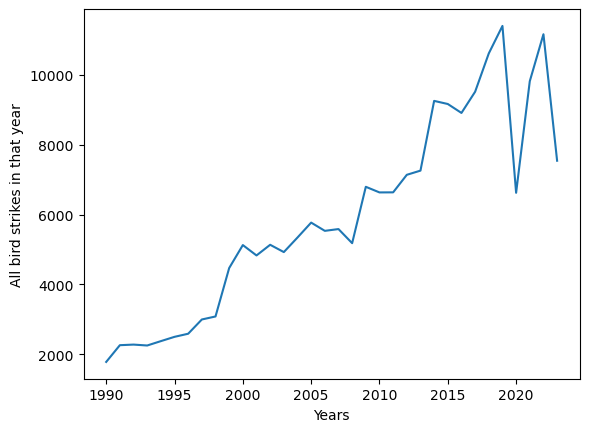

In [9]:
airplanes_strikes_df_for_plot = airplanes_strikes_df.groupby("INCIDENT_YEAR").agg({'INDEX_NR': 'count'})
# Make sure that INCIDENT_YEAR column is not used as index and is available for plot
airplanes_strikes_df_for_plot.reset_index(inplace=True)

x = airplanes_strikes_df_for_plot["INCIDENT_YEAR"]
y = airplanes_strikes_df_for_plot["INDEX_NR"]
plt.xlabel("Years")
plt.ylabel("All bird strikes in that year")
plt.plot(x,y)

We see that in general, number of strikes increases, but there was a significant decrease in 2020. It happened probably due to pandemic when air travel was at low. Now, let's create the same plot but for helicopters.

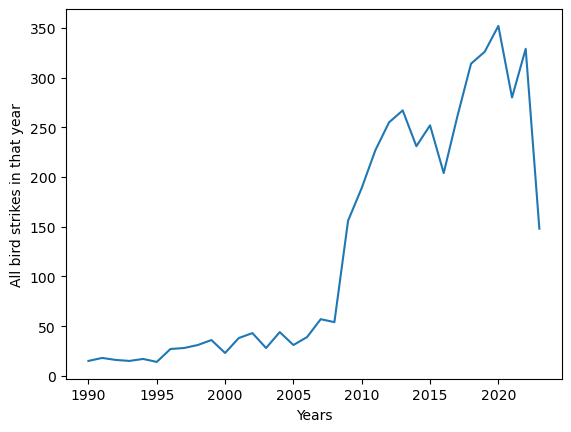

In [10]:
helicopters_strikes_df_for_plot = helicopters_strikes_df.groupby("INCIDENT_YEAR").agg({'INDEX_NR': 'count'})
# Make sure that INCIDENT_YEAR column is not used as index and is available for plot
helicopters_strikes_df_for_plot.reset_index(inplace=True)

x = helicopters_strikes_df_for_plot["INCIDENT_YEAR"]
y = helicopters_strikes_df_for_plot["INDEX_NR"]
plt.xlabel("Years")
plt.ylabel("All bird strikes in that year")
plt.plot(x,y)

First, it is obvious that bird strikes are far less frequent for helicopters (~29 times less frequent). Also observe that in the early 2000s the number of strikes for helicopters was growing very slowly, before drastically increasing in 2008-2009. The number of bird strikes also decreased during the pandemic (from 350 in 2019 to around 270 in 2020) and has been decreasing ever since.

Let's turn our attention to individual states and see in what parts of the country bird strikes tend to happen more often. We will also create a share column, indicating how much in percentages each state contributes to the total number of bird strikes in North America.

## Finding in what states incidents happen most often

In [90]:
grouped = airplanes_strikes_df.groupby("STATE").agg({'INDEX_NR': 'count'})
grouped.reset_index(inplace=True)
grouped.columns = ['State', 'Incidents']
total = grouped.agg({'Incidents': 'sum'})['Incidents']
grouped["Share"] = grouped["Incidents"] * 100/total
grouped.sort_values(by="Share", ascending=False, inplace=True)

In [12]:
grouped.head(10)

State  Incidents     Share
57    TX      15994  9.369764
7     CA      15776  9.242053
12    FL      14684  8.602327
44    NY       8983  5.262510
19    IL       7187  4.210360
56    TN       6944  4.068003
49    PA       6190  3.626287
8     CO       6128  3.589966
35    NC       5082  2.977188
45    OH       4821  2.824286

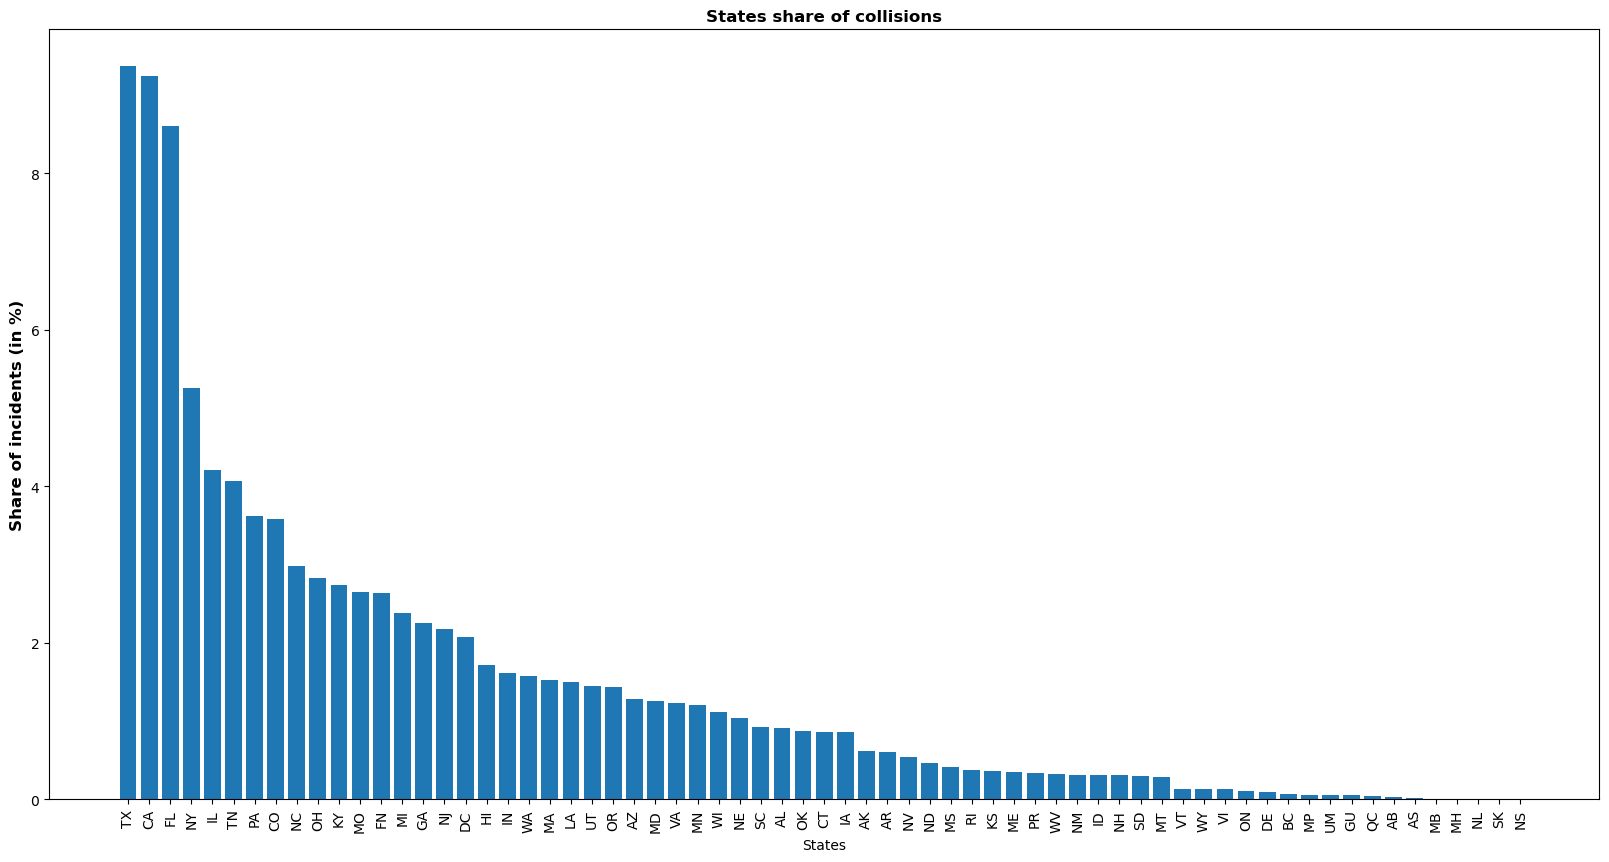

In [93]:
categories = grouped["State"]
plt.figure(figsize=(20, 10))
plt.bar(categories, grouped["Share"])
plt.ylabel("Share of incidents (in %)", fontsize=12, weight='bold')
plt.xlabel("States")
plt.xticks(range(len(categories)), categories, rotation=90)

plt.title("States share of collisions", fontsize=12, weight='bold')
top_6_states = grouped["State"].tolist()[:6]
plt.show()

We see that the states with most collisions are Texas and Florida, the southern states. California is not considered a southern state, but it also has a warm climate. I think that it would be interesting to look if there are any season related changes in bird strike patterns.

New York State looks like an outlier, but it can be explained since it has 3 busy airport in NYC area. We now want to see how number of bird strikes relate to the state and month when the collision happened.

## Finding in what months incidents happen most often

Before we look at the relationship between month and the number of incidents, we want to investigate what bird species are generally involved in the incidents in the state with the most incidents.

In [74]:
strikes_in_tx = airplanes_strikes_df[airplanes_strikes_df["STATE"] == "TX"]

species_count = strikes_in_tx['SPECIES'].value_counts()
species_count.head(5)

SPECIES
Unknown bird - small     4972
Unknown bird - medium    2742
Unknown bird             2485
Mourning dove             764
Rock pigeon               451
Name: count, dtype: int64

Unfortunately, we don't know the species of the bird that was in the most incidents. However, we do know that smaller birds are involved in the incidents more often than the larger birds.

In [16]:
top_states = ["TX", "CA", "FL", "NY", "IL"]
for i in range(len(top_states)):
    selected = airplanes_strikes_df[airplanes_strikes_df["STATE"] == top_states[i]]
    month_counts = selected['INCIDENT_MONTH'].value_counts()
    highest_month = month_counts.idxmax()
    highest_num_collisions_in_month = month_counts.max()
    print("Month number with most bird-strikes in " + top_states[i] + " is: " + str(highest_month))
    print("Number of strikes in that month: " + str(highest_num_collisions_in_month))

Month number with most bird-strikes in TX is: 8
Number of strikes in that month: 2020
Month number with most bird-strikes in CA is: 4
Number of strikes in that month: 1579
Month number with most bird-strikes in FL is: 8
Number of strikes in that month: 2194
Month number with most bird-strikes in NY is: 10
Number of strikes in that month: 1522
Month number with most bird-strikes in IL is: 8
Number of strikes in that month: 1321


We can observe that most dangerous periods of the year are the Fall and the end of the Summer. 

### Checking what airports have the most incidents

Now, we also want to calculate average number of strikes by airport. This will help us determine the airports where the bird-strikes happen most often.

In [89]:
grouped_by_airport = airplanes_strikes_df.groupby(["AIRPORT", "AIRPORT_ID"]).agg({"INDEX_NR": 'count'})
grouped_by_airport.drop(['UNKNOWN'], inplace=True)
grouped_by_airport_sorted = grouped_by_airport.sort_values(by="INDEX_NR", ascending=False)
grouped_by_airport_sorted.head(5)

INDEX_NR
AIRPORT                     AIRPORT_ID          
DENVER INTL AIRPORT         KDEN            4785
DALLAS/FORT WORTH INTL ARPT KDFW            4165
MEMPHIS INTL                KMEM            3977
CHICAGO O'HARE INTL ARPT    KORD            3746
SACRAMENTO INTL             KSMF            3407

We can note that all these airports are situated in regions characterized by flat terrain.

* KDFW has forested areas to north and east of the airport. Grapevine Lake Area is also of note.

* KMEM there are wooded areas such as Fuller State Park and Meeman-Shelby Forest State Park

* KORD there are forested areas to the north and northwest of the airport, including the Des Plaines River Valley and Ned Brown Forest

Based on our data we can hypothesize that proximity to the wooded area increases the chance of the bird strikes.

Next, we want to look at the average height on which collisions have occurred.

#### Checking relationship between height and the number of incidents

In [18]:
height_analysis_df = airplanes_strikes_df.copy()
height_analysis_df["HEIGHT_DEV"] = height_analysis_df["HEIGHT"] 
grouped_data = height_analysis_df.groupby(["AIRPORT_ID", "AIRCRAFT"]).agg({"HEIGHT": "mean", "HEIGHT_DEV": "std" })
grouped_data.reset_index(inplace=True)
grouped_data.columns = ["AIRPORT_ID", "FLIGHT_TYPE", "AVG_HEIGHT", "ST DEV"]
filtered = grouped_data[grouped_data["AIRPORT_ID"] == "KIAD"]
filtered.head(10)

AIRPORT_ID FLIGHT_TYPE   AVG_HEIGHT       ST DEV
10682       KIAD       A-220          NaN          NaN
10683       KIAD       A-300  1783.750000  2013.013910
10684       KIAD       A-310  1368.333333  2064.271461
10685       KIAD       A-319   841.538462  1612.416888
10686       KIAD       A-320   703.871951  1221.122802
10687       KIAD       A-321   780.000000   837.854403
10688       KIAD       A-330     0.000000     0.000000
10689       KIAD       A-340    75.000000   150.000000
10690       KIAD       A-350     0.000000     0.000000
10691       KIAD       A-380     0.000000     0.000000

We tried to look for the average height where bird strikes occur. Using several different variables we tried to check for a relationship between those variables and average height where bird strikes occur. Since the Standard Deviation is always at least as high as an average height and sometimes twice that makes us conclude that the data spread is very high. Because of this, we can say that the average collision height is more or less arbitrary.

I believe that it will be very informative to create a plot for number of incidents per month for every month of the year, for every state in the states with most bird strikes. As a remainder, those states are listed below.

In [19]:
print(top_6_states)

['TX', 'CA', 'FL', 'NY', 'IL', 'TN']


## Analysis Of Seasonality

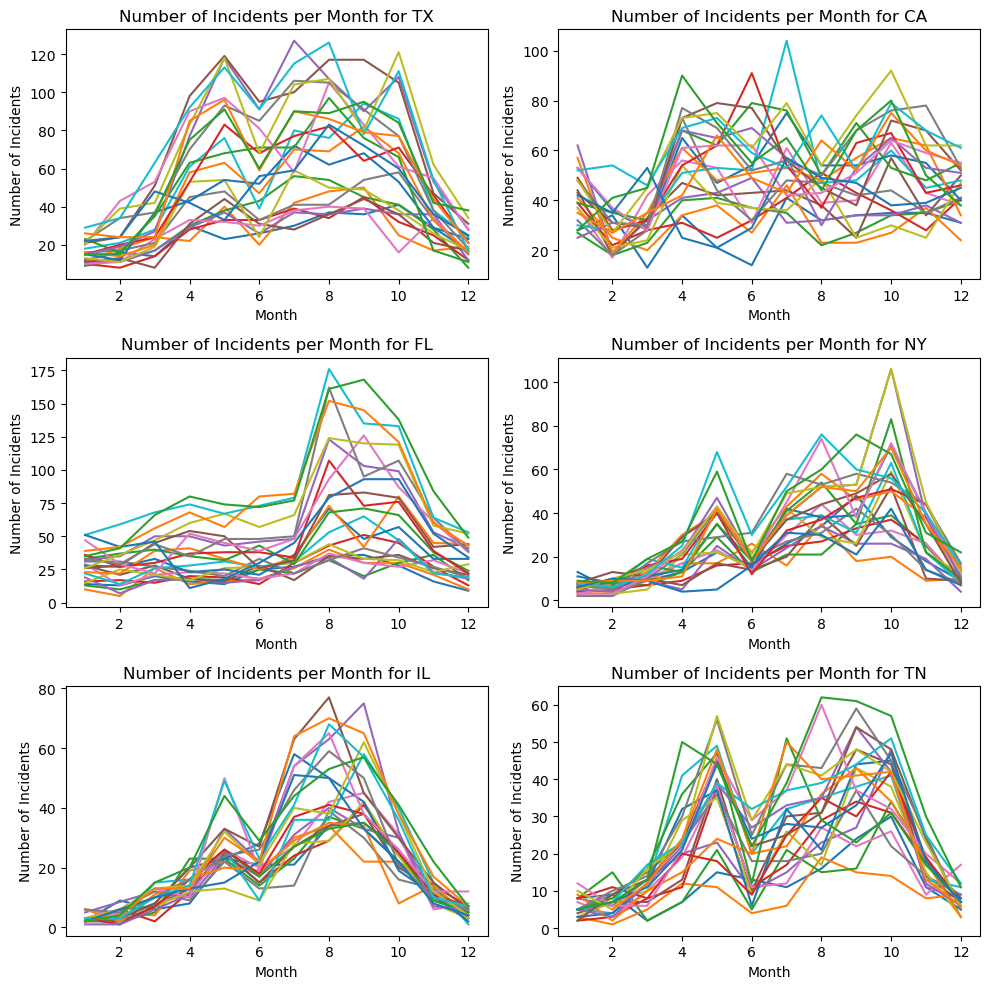

In [20]:
fig, axis = plt.subplots(3, 2, figsize=(10, 10), subplot_kw={'frame_on': True})

for i in range(0, len(top_6_states)):
    row = i // 2
    col = i - row * 2

    subplot = axis[row,col]

    state = top_6_states[i]
    filtered_by_state = airplanes_strikes_df[airplanes_strikes_df["STATE"] == state]

    for year in range(2000, 2023):
        filtered_by_year = filtered_by_state[filtered_by_state["INCIDENT_YEAR"] == year]
        # Count the incidents
        grouped_by_month = filtered_by_year.groupby("INCIDENT_MONTH").agg({"INDEX_NR": "count"})
        grouped_by_month.reset_index(inplace=True)
        x = grouped_by_month["INCIDENT_MONTH"]
        y = grouped_by_month["INDEX_NR"]
        subplot.plot(x, y, label=f"{state}-{year}")

        subplot.set_xlabel('Month')
        subplot.set_ylabel('Number of Incidents')
        subplot.set_title(f'Number of Incidents per Month for {state}')
        #subplot.legend()
plt.tight_layout()
plt.show()

The data plotted above was not normalized. Still, it allowed us to see that there is a relationship between a month and a number of bird strikes happening at a particular state. We will now normalize the data using the following formula: (x - mean(x)) / st_dev(x). Hopefully, it will help us visualize the trends more clearly.

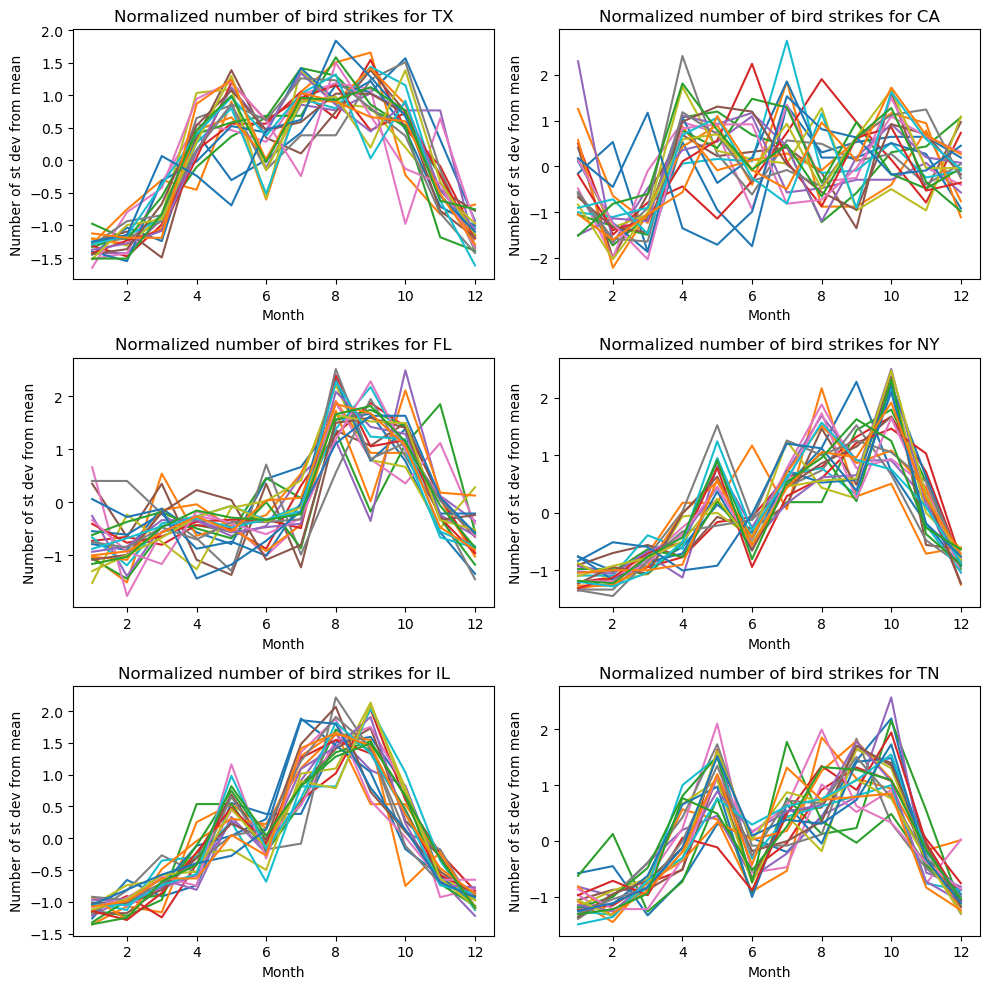

In [21]:
airplanes_strikes_df_norm = airplanes_strikes_df.copy()
fig, axis = plt.subplots(3, 2, figsize=(10, 10), subplot_kw={'frame_on': True})

for i in range(0, len(top_6_states)):
    row = i // 2
    col = i - row * 2

    subplot = axis[row,col]

    state = top_6_states[i]
    filtered_by_state = airplanes_strikes_df[airplanes_strikes_df["STATE"] == state]
    for year in range(2000, 2023):
        filtered_by_year = filtered_by_state[filtered_by_state["INCIDENT_YEAR"] == year]
        # Count the incidents
        grouped_by_month = filtered_by_year.groupby("INCIDENT_MONTH").agg({"INDEX_NR": "count"})
        grouped_by_month.reset_index(inplace=True)
        
        mean = grouped_by_month["INDEX_NR"].mean()
        st_dev = grouped_by_month["INDEX_NR"].std()
        
        grouped_by_month["Normalized_strikes"] = (grouped_by_month["INDEX_NR"] - mean) / st_dev

        x = grouped_by_month["INCIDENT_MONTH"]
        y = grouped_by_month["Normalized_strikes"]
        subplot.plot(x, y, label=f"{state}-{year}")
    
        subplot.set_xlabel('Month')
        subplot.set_ylabel('Number of st dev from mean')
        subplot.set_title(f'Normalized number of bird strikes for {state}')
        #subplot.legend()
plt.tight_layout()
plt.show()

After normalizing the number of bird strikes using (observation - mean observation) / st. dev formula, it is more clear now at what month the most bird strikes occur. Here is a breakdown:
* In TX, most strikes happen in months 5, 8, and 10
* In CA, most strikes happen in months 4 and 7, but it is hard to see
* In FL, most strikes happen in months 8 and 10
* In NY, most strikes happen in months 5, 8, and 10
* In IL, most strikes happen in months 5 and 9
* In TN, most strikes happen in months 5 and 10

In States with most birds trikes, the peak seem to happen in Month 5 and 10, that is in Autumn and Spring. Those month usually correlate with bird migration activities.

### Building a Heat Map
Now that we saw that there is a pattern between a month and a number of birdstrikes that happen in that time frame, we want to plot that on the map of the US. 

We will split the data into seasons, plot it, and see the movement of birdstrike clusters around the country as seasons change. Our initial hypothesis is that the number of clusters would not change much, but they would move around the map as birds migrate towards the south or north, depending on the season.

Before we do that, we need to download a file with state boundaries and then exclude the non-continental territories and states, so that the map fits on the screen.

In [52]:
# Read administrative US states boundaries
states = gpd.read_file('data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

# Filter out non-continental states and territories to make map look nicer
states = states.loc[~states['STUSPS'].isin(['HI', 'AK', 'PR', 'VI', 'MP', 'GU', 'AS'])]

### Build the spatial grid to cover the continental US

In [53]:
grid = h3fy(states, resolution=5)

In [54]:
df_sample = airplanes_strikes_df[airplanes_strikes_df['INCIDENT_YEAR'] == 2018].copy()
# Filter by state living only US states
df_sample = df_sample[df_sample['STATE'].isin(states['STUSPS'].values)]

In [55]:
# Create Geometry Points for the events
df_sample['Event_Cords'] = list(zip(df_sample.LONGITUDE, df_sample.LATITUDE))
df_sample['Event_Cords'] = df_sample['Event_Cords'].apply(Point)

# Load the GeoDataFrame
gdf_strikes = gpd.GeoDataFrame(df_sample, geometry='Event_Cords', crs='EPSG:4269')

In [56]:
# Prepare the grid with strike density information
joined = gpd.sjoin(grid, gdf_strikes, how='inner', predicate='contains')
# Group by hex_id and count the number of strikes
grouped = joined.groupby('hex_id').size().reset_index()
grouped.columns = ['hex_id', 'strike_count']

#join grouped data back with grid
strikes_grid_df = grid.merge(grouped, on='hex_id', how='inner')
strikes_grid_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hex_id        581 non-null    object  
 1   geometry      581 non-null    geometry
 2   strike_count  581 non-null    int64   
dtypes: geometry(1), int64(1), object(1)
memory usage: 13.7+ KB


### Creating bird strikes heat map for the entire year

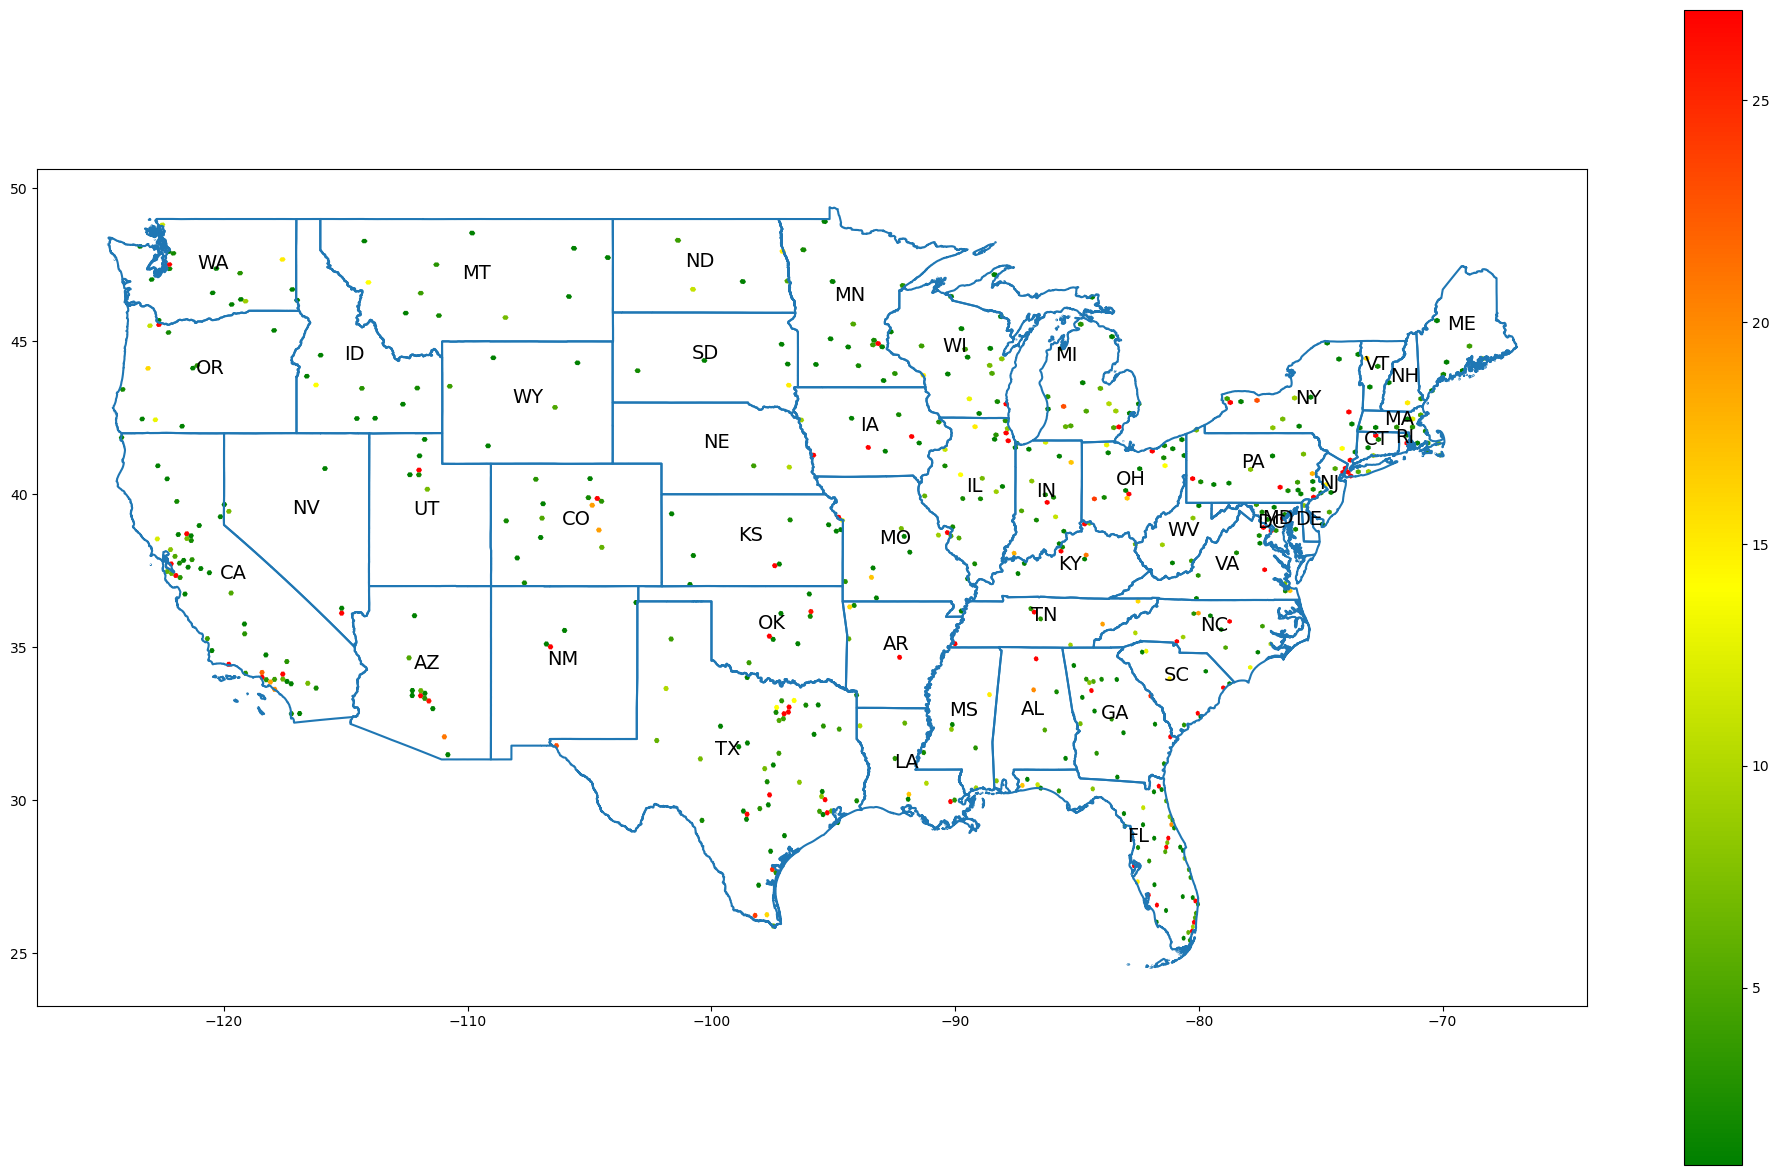

In [91]:
fig, ax = plt.subplots(figsize=(25,15))
# Add labels with states names to the map
states.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
states.boundary.plot(ax=ax)

# Plot the heatmap using strike_count values from 'strikes_grid_df' GeoDataFrame
cmap = mcolors.LinearSegmentedColormap.from_list("GnYlRd", ["green", "yellow", "red"])
strikes_grid_df.plot(column='strike_count', cmap=cmap, ax=ax, vmax=strikes_grid_df['strike_count'].mean()*2, legend=True)

plt.show()

This is the heat map of bird strike incidents for the continental US for the entire year 2018. We took pre-pandemic data to avoid the influence of post pandemic trends on analysis.  Green represent fewer incidents, red represents more incidents.

Located in the cell below are utility functions that will help us build seasonal heat maps.

In [68]:
def get_strikes_grid_for_season(season):
    month_filter = []

    if season == 'Winter':
        month_filter = [12, 1, 2]
    elif season == 'Spring':
        month_filter = [3, 4, 5]
    elif season == 'Summer':
        month_filter = [6, 7, 8]
    elif season == 'Fall':
        month_filter = [9, 10, 11]
    else:
        raise ValueError('Invalid season')

    gdf_strikes_season = gdf_strikes[gdf_strikes['INCIDENT_MONTH'].isin(month_filter)]
    joined_df = gpd.sjoin(grid, gdf_strikes_season, how='inner', predicate='contains')
    # Group by hex_id and count the number of strikes
    grouped_df = joined_df.groupby('hex_id').size().reset_index()
    grouped_df.columns = ['hex_id', 'strike_count']

    #join grouped data back with grid
    return grid.merge(grouped_df, on='hex_id', how='inner')

def make_subplot(ax, gdf, title):
    states.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1)
    states.boundary.plot(ax=ax)

    cmap = mcolors.LinearSegmentedColormap.from_list("GnYlRd", ["green", "yellow", "red"])
    gdf.plot(column='strike_count', cmap=cmap, ax=ax, legend=True)
    ax.set_title(title, fontsize=18, weight='bold')
    ax.set_axis_off()

### Creating bird strikes heat map for every season

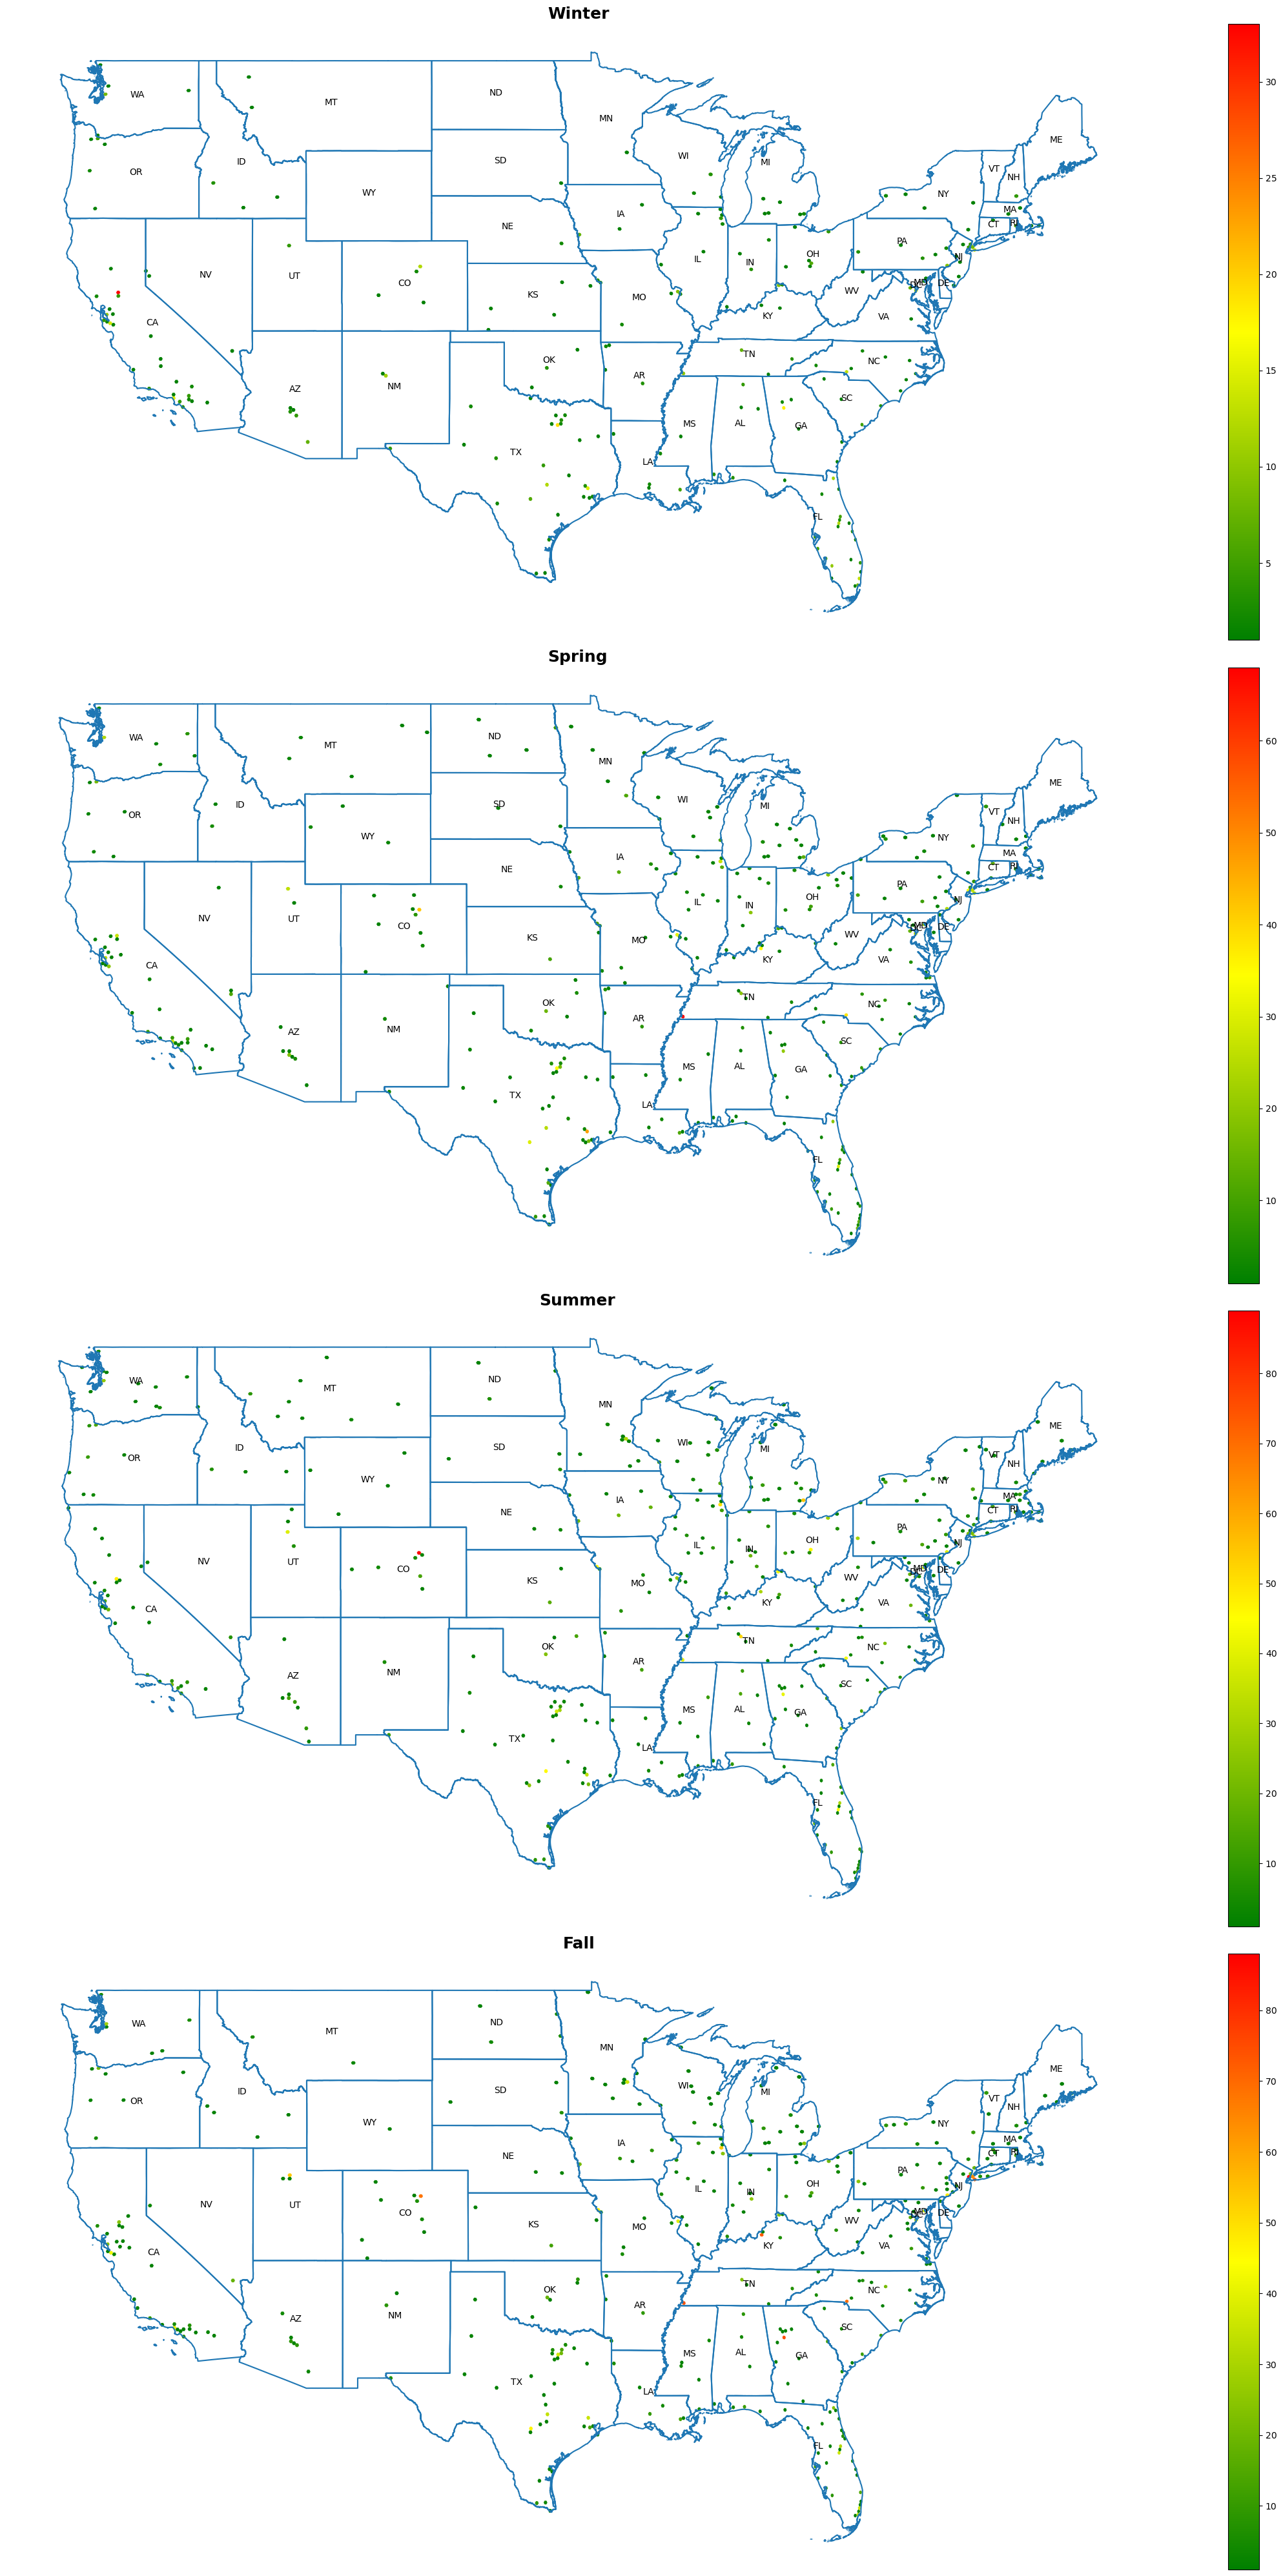

In [69]:
fig, axs = plt.subplots(4, 1, figsize=(25, 40))
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    gdf = get_strikes_grid_for_season(season)
    make_subplot(axs[i], gdf, season)
plt.tight_layout()

### Brief summary of heat map findings

After looking at the maps, we see that the initial assumption was not correct. Despite the change in season, bird strikes are still clustered around the same airports. We see only changes in the number of incidents. The peak number of incidents happens in the summer (the maximum number of incidents per cluster is 200+) followed by Fall and Spring. Both of them have the maximum number of incidents, which is approximately more than 100. Winter has the lowest count of incidents (around 35 incidents as a maximum per cluster).

## Relating airspeed to the number of collisions

Let's turn attention to how aircraft airspeed relates to the number of the bird strikes. We would do so by bucketing the speed into the specific ranges.

We convert speed to m/s to relate the speed of the aircraft to possible time species might have to react. We believe bird's reaction time ~3 seconds + ~6 seconds to change its flight path = ~10 seconds to avoid collision. Using m/s we can now deduce how far away the plane should be to ensure that the bird has enough time to get out of the way.

Now that we saw that there is a pattern between a month and a number of bird strikes that happen in that time frame, we want to plot that on the map of the US. 


In [23]:
airplanes_strikes_df["SPEED_MPS"] = airplanes_strikes_df["SPEED"] * (1.1508 * 1.609 * 1000) / 3600
airplanes_strikes_df["SPEED_MPS"].describe(percentiles=[0.95])

count    90777.000000
mean        74.030942
std         23.991387
min          0.000000
50%         72.008113
95%        128.585917
max        642.929583
Name: SPEED_MPS, dtype: float64

This output tells us that 95% of the airspeed is below ~130 m/s. For convenience, we will split airspeed into four categories or "buckets", where each 30 m/s increase would move the speed into the next bucket.

In [24]:
speed_bins = [30, 60, 90, 120, 150]
with_speed_df = airplanes_strikes_df[~airplanes_strikes_df["SPEED"].isna()].copy()
# We decided that we include the lowest value in the interval and exclude the highest. This ensures that the border values don't get added to the same bucket twice.
with_speed_df["SPEED_BUCKET"] = pd.cut(with_speed_df['SPEED_MPS'], speed_bins, include_lowest=True, right=False)
with_speed_df["SPEED_BUCKET"].describe()

with_speed_df_for_plot = with_speed_df.groupby("SPEED_BUCKET", observed=False).agg({'SPEED': 'count'})
with_speed_df_for_plot.reset_index(inplace = True)
with_speed_df_for_plot.columns = ["SPEED_BUCKET", "COUNT"]
with_speed_df_for_plot.head(10)

SPEED_BUCKET  COUNT
0     [30, 60)  18877
1     [60, 90)  51760
2    [90, 120)  12765
3   [120, 150)   5482

Now we will create a bar graph to compare the ranges of airspeed created above to the number of bird strikes that fall in that range. The initial hypothesis is that as speed increases, the number of bird strikes would also increase since birds would not have enough time to notice and move out of the way of an incoming airplane.

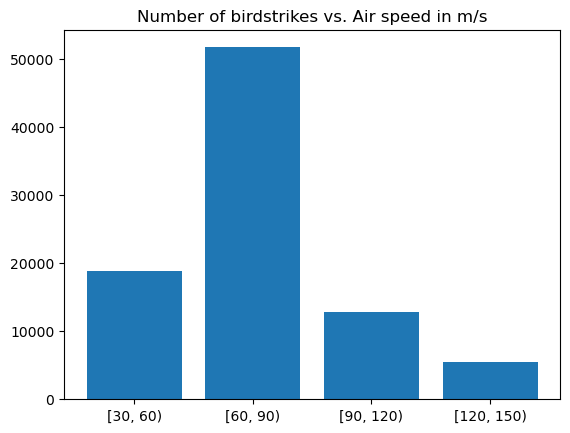

In [25]:
x = with_speed_df_for_plot["SPEED_BUCKET"].apply(lambda elem: str(elem))
y = with_speed_df_for_plot["COUNT"]

plt.bar(x,y)
plt.title("Number of birdstrikes vs. Air speed in m/s")
plt.show()

The graph tells us that half of all incidents happen in the range of speed 60-90 m/s (this accounts for 50,000 incidents) and then significantly decreases from there. These findings do not support our initial hypothesis.

We also want to investigate how airspeed relates to the typical height where collisions happen. We will use the same bucketing approach described previously.

In [26]:
with_height_df = airplanes_strikes_df[~airplanes_strikes_df["HEIGHT"].isna()].copy()
with_height_df["HEIGHT"].describe(percentiles=[0.95])

count    143919.000000
mean        863.246229
std        1863.275892
min           0.000000
50%          30.000000
95%        4700.000000
max       31300.000000
Name: HEIGHT, dtype: float64

The data looks to be highly skewed toward low heights (50% of all heights are below 30 feet), so we will use the logarithmic to divide data into buckets.

In [27]:
height_bins = [0, 10, 100, 1000, 5000]
with_height_df["HEIGHT_BUCKET"] = pd.cut(with_height_df['HEIGHT'], height_bins, include_lowest=True, right=False)
with_height_df["HEIGHT_BUCKET"].describe()

with_speed_df_for_plot = with_height_df.groupby("HEIGHT_BUCKET", observed=False).agg({'HEIGHT': 'count'})
with_speed_df_for_plot.reset_index(inplace = True)
with_speed_df_for_plot.columns = ["HEIGHT_BUCKET", "COUNT"]
with_speed_df_for_plot.head(10)

HEIGHT_BUCKET  COUNT
0       [0, 10)  64196
1     [10, 100)  15401
2   [100, 1000)  30053
3  [1000, 5000)  27182

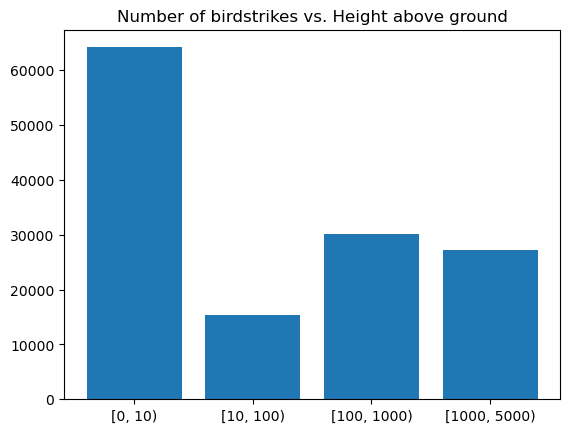

In [28]:
x = with_speed_df_for_plot["HEIGHT_BUCKET"].apply(lambda elem: str(elem))
y = with_speed_df_for_plot["COUNT"]

plt.bar(x, y)
plt.title("Number of birdstrikes vs. Height above ground")
plt.show()

### Brief Summary of findings

The clustering of data around low height of the strikes might indicate that the accidents happen during takeoff roll or during landing. Now, compare that to the takeoff and landing speed for jets which compromise the majority of the data set.

* The typical takeoff speed for jet-powered aircraft is 67-79 m/s.
* The typical landing speed for jet-powered aircraft is 67-73 m/s.

The intervals for takeoff and landing speed follow precisely into the speed bucket with most accidents (range: 60-90 m/s)

This analysis tells us that most bird strikes happen during takeoff or landing. Now, let's see if we can be more specific if we look at the exact description of the flight phase when strike happened. We will perform that analysis for both helicopters and planes and compare the results.

##  Relating the phase of flight to number of incidents

In [29]:
def display_phase_graph(data, label):
    valid_entries = data[data['PHASE_OF_FLIGHT'].notnull()]
    counts = valid_entries['PHASE_OF_FLIGHT'].value_counts()
    
    phase_counts = counts.sort_index()
    plt.bar(phase_counts.index, phase_counts)
    
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Strikes')
    plt.title(f'Number of Strikes by Phase of Flight for {label}')
    
    plt.xticks(rotation=45, ha='right')
    
    plt.show()   

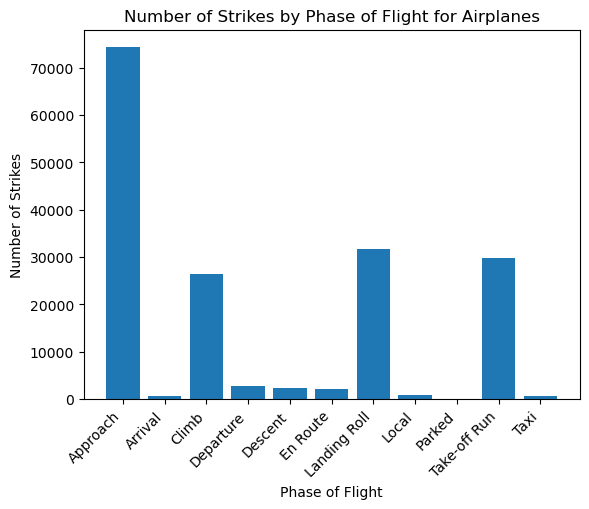

In [30]:
display_phase_graph(airplanes_strikes_df, 'Airplanes')

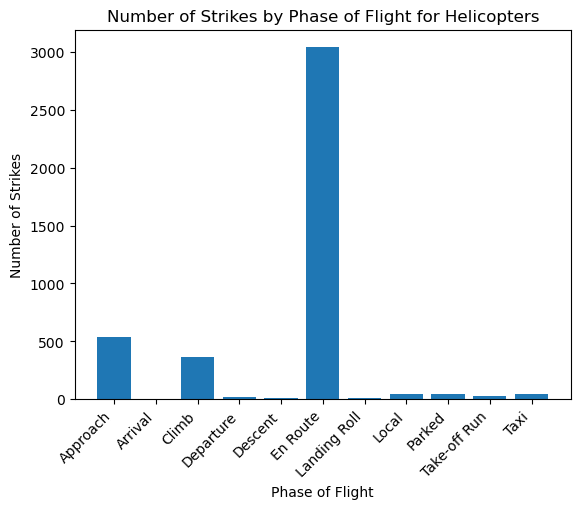

In [31]:
display_phase_graph(helicopters_strikes_df, 'Helicopters')

We see that the majority of birds trikes happen during Approach phase for airplanes and the En-Route phase for helicopters. So, our previous conjecture that the majority of strikes happen during landing was not quite right. It would be more appropriate to say that the majority of strikes happen as plane descends from cruising altitude and prepares to land. This actually makes sense since on approach the plan cruises at relatively low altitude for a prolonged periods of time, while still moving fast. 

Next, we want to investigate the dependence between the number of incidents and the time of day.

## Relating the time of day to number of incidents

In [100]:
def plot_pie_chart(data, col_name, label, threshold, colors=None, param_labels=None):
    valid_entries = data[data[col_name].notnull()]
    counts = valid_entries[col_name].value_counts()
    total_entries = sum(counts)
    percentage_share = [(elem / total_entries) * 100 for elem in counts]
    labels_for_plot = counts.index.tolist()

    if param_labels is not None:
        labels_for_plot = param_labels

    # Check if percentage is greater than threshold, if not do not show it on the plot
    def formatting(pct):
        return f'{pct:.1f}%' if pct > threshold else ''

    if colors is not None:
        plt.pie(percentage_share, labels=labels_for_plot, colors=colors, 
                autopct=formatting, shadow=True, startangle=140)
    else:
        plt.pie(percentage_share, labels=labels_for_plot,  
                autopct=formatting, shadow=True, startangle=140)
    
    plt.title(label)
    
    # Display the chart
    plt.show()

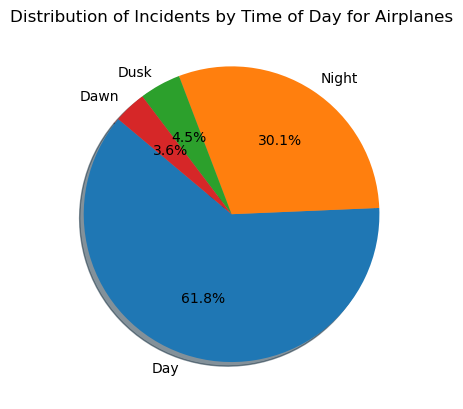

In [33]:
plot_pie_chart(airplanes_strikes_df,'TIME_OF_DAY', 'Distribution of Incidents by Time of Day for Airplanes', 2)

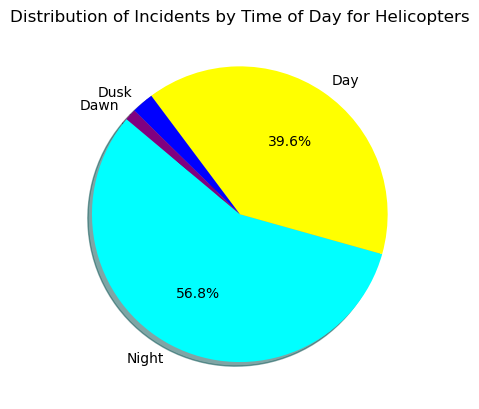

In [34]:
plot_pie_chart(helicopters_strikes_df, 'TIME_OF_DAY', 'Distribution of Incidents by Time of Day for Helicopters',3, ['cyan', 'yellow', 'blue', 'purple'])

### Brief summary of findings
Surprisingly, the distribution of Incidents differ significantly for planes and helicopters. The majority of the incidents for planes happen during the day 61.8%. The majority of the incidents for helicopters happen at night, 56.8%.

Some birds are more active at night. Since helicopters fly at lower altitudes compared to airplanes, the chance that they strike a bird in limited visibility conditions is higher.

I believe it would be a useful to draw a similar pie chart for damage level. Again, I would repeat it for both airplanes and helicopters data.

## Relating the damage level to the number of incidents

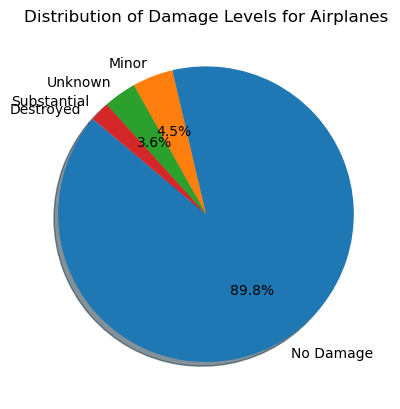

In [101]:
plot_pie_chart(airplanes_strikes_df, 'DAMAGE_LEVEL','Distribution of Damage Levels for Airplanes',3, None, ['No Damage', 'Minor', 'Unknown', 'Substantial', 'Destroyed'])

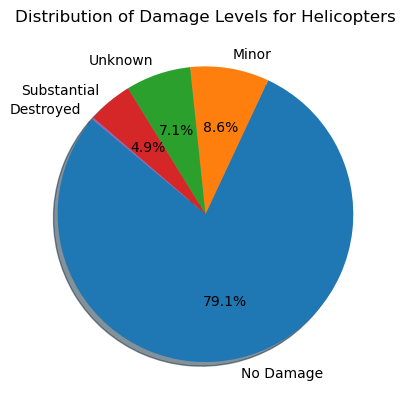

In [102]:
plot_pie_chart(helicopters_strikes_df, 'DAMAGE_LEVEL',  'Distribution of Damage Levels for Helicopters',3, None, ['No Damage', 'Minor', 'Unknown', 'Substantial', 'Destroyed'])

### Brief summary of findings
Based on the pie charts, we see that ~85% of the time bird strikes result in no damage. Only ~5% of all incidents results in substantial damage.These findings show how improvements and developments in aviation safety help protect the passengers and prevent serious damage to the aircraft.

# STEP 4: Machine Learning Models

## Brief introduction 

We will now use the Scikit-learn library and several different ML models to predict the number of bird strikes, given the airport, season, aircraft operator, and aircraft type (independent variables). We chose those as dependent variables based on our previous analysis. 

Since all our dependent variables are categorical, we will need to Encode them before fitting a model to data. We won’t use OneHotEncoding because our dataset is very large and already has high dimensions. Instead, we’ll use Label Encoding to encode the features. It is easy to interpret, and it won’t increase the dimensionality of the dataset.

We will first fit data to a Decision Tree Regressor. The Decision Trees are easy to interpret, and they work very well with categorical data. I decided against a Multivariate regression model because the relationship between independent variables and a dependent variable appears to be non-linear.To evaluate model performance, we will use MSE (Mean Squared Error) as it is very commonly employed and gives a good sense of “how far off the model is on average.”

I would then use GridSearchCV - a cross-validation technique - to find the optimal set of the parameters for the tree. I would then re-fit the data on the Decision Tree built using the parameters I got from GridSearchCV.  If MSE will continue to be high, we will build a Random Forest and evaluate how well it performs, by measuring MSE of the Random Forest.


In [37]:
def extract_season_from_month(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10, 11]:
        return "Fall"
    
    raise Exception("Incorrect month value")

airplanes_strikes_df["SEASON"] = airplanes_strikes_df["INCIDENT_MONTH"].apply(lambda month: extract_season_from_month(month))

In [38]:
feature_columns = ["SEASON", "AIRPORT_ID", "OPERATOR", "AIRCRAFT"]
to_select_variables = ["INDEX_NR", "INCIDENT_YEAR"] + feature_columns
df_copy = (airplanes_strikes_df.loc[ :, to_select_variables]).copy()
df_copy = df_copy[df_copy["INCIDENT_YEAR"].isin([2016, 2017, 2018])]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29041 entries, 156435 to 288748
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   INDEX_NR       29041 non-null  int64 
 1   INCIDENT_YEAR  29041 non-null  int64 
 2   SEASON         29041 non-null  object
 3   AIRPORT_ID     29041 non-null  object
 4   OPERATOR       29041 non-null  object
 5   AIRCRAFT       29041 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [39]:
df_copy.dropna(inplace=True)
df_for_tree = df_copy.groupby(feature_columns).agg({'INDEX_NR': 'count'}).reset_index()
columns = feature_columns + ["INCIDENT_COUNT"]
df_for_tree.columns = columns
df_for_tree.head(5)

SEASON AIRPORT_ID         OPERATOR        AIRCRAFT  INCIDENT_COUNT
0   Fall        1G0         BUSINESS  PA-44 SEMINOLE               1
1   Fall        1G3       GOVERNMENT           C-172               1
2   Fall       1TT8  PRIVATELY OWNED           PA-28               1
3   Fall        2A0         BUSINESS           C-172               1
4   Fall        4R5          UNKNOWN    PA-31 NAVAJO               1

We can note that incident count in each row is quite low, so we can't add any more parameters to the model.

In [40]:
df_for_tree["INCIDENT_COUNT"].describe()

count    13661.000000
mean         2.125833
std          4.682595
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        184.000000
Name: INCIDENT_COUNT, dtype: float64

## Perform the Label Encoding on the data to prepare it for the training.

In [41]:
independent_vars = feature_columns
dependent_var = ['INCIDENT_COUNT']
X, y = df_for_tree[independent_vars], df_for_tree[dependent_var]
X_encoded = X.copy()
label_encoder = LabelEncoder()

for column in feature_columns:
    X_encoded[column] = label_encoder.fit_transform(X[column])

## Looking for correlation between the features
Before we choose the ML model, let's plot every independent variable against a dependent variable (number of birds trikes). We will do so by looking at correlation and scatter matrix

In [42]:
correlation_matrix = X_encoded.corr()
print(correlation_matrix)

              SEASON  AIRPORT_ID  OPERATOR  AIRCRAFT
SEASON      1.000000    0.001995 -0.001517  0.012436
AIRPORT_ID  0.001995    1.000000 -0.020730 -0.068780
OPERATOR   -0.001517   -0.020730  1.000000 -0.103846
AIRCRAFT    0.012436   -0.068780 -0.103846  1.000000


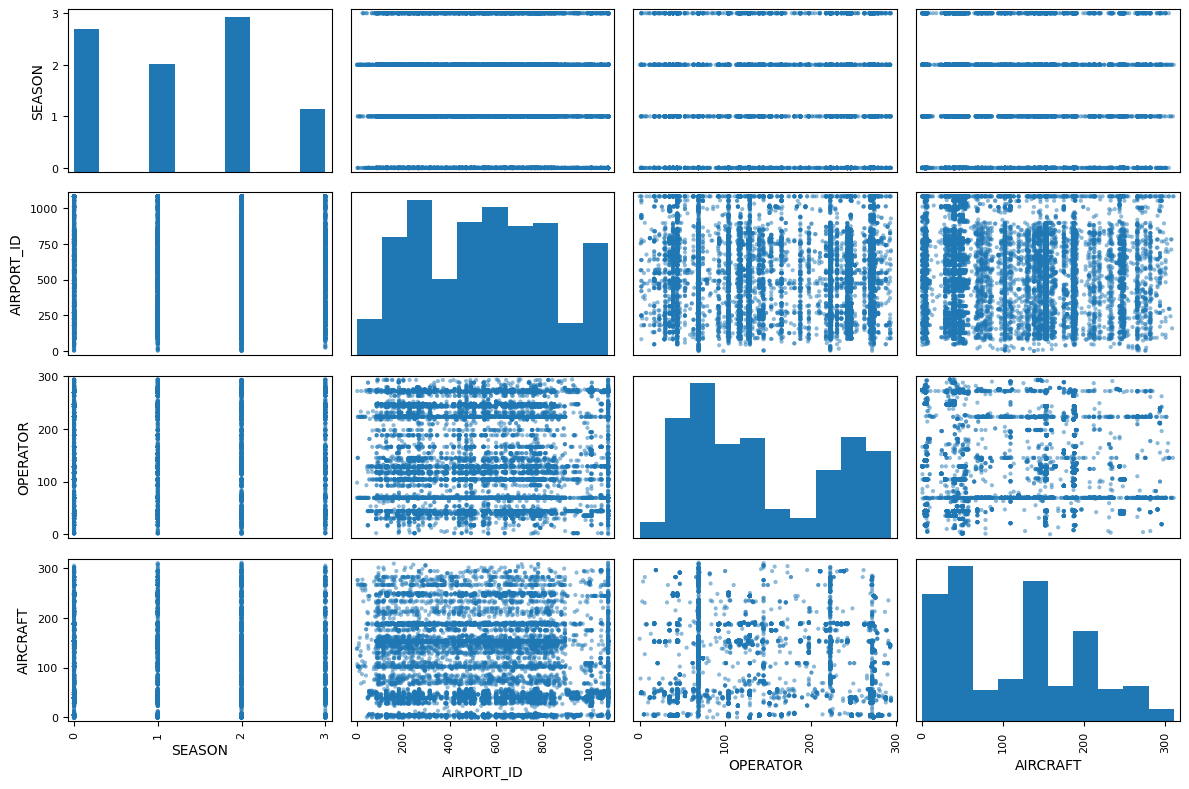

In [43]:
scatter_matrix(X_encoded[feature_columns], figsize=(12, 8))
plt.tight_layout()
plt.show()

As we can see, there does not appear to be a simple linear relationship between features, so we will use a more complex model. Since we will be using GridSearch to find optimal model parameters, we won't pass anything to the DecisionTreeRegressor constructor.

## Training a model

In [44]:
#Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor()

# Train the model using the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree_regressor.predict(X_test)

# Evaluate the performance of the model by looking at Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.409440175631175


## Analyzing the magnitude of the prediction error
In the context of our data this Error is very high. I want to try GridSearchCV to find the model parameters that would result in the best fit.

With our range of parameters, Scikit-Learns needs to build 2560 different decision tree regressors. This requires a lot of computational resources and time. To speed up the process, I will use parallel_backend from the joblib library. This will allow me to split the work and run processes in parallel. My computer has 16 logical units, so I will run 16 different processes (set n_jobs parameter to 16).

In [45]:
# Define the parameter grid. The fit function will vary these parameters and compute how well well the model behaves in order to find the best set of parameters.
param_grid = {
    'criterion': ["squared_error", "absolute_error"],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Initialize GridSearchCV with parallel processing
with parallel_backend('threading', n_jobs=16):
    grid_validator = GridSearchCV(
        tree_regressor,
        param_grid=param_grid,
        cv=5,
        verbose=1
    )

    grid_validator.fit(X_train, y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


Now let's see what the best model should look like after performing Cross-Validation. And how much can we improve accuracy after we refit the data on the model found by Grid Search Cross Validation.

## Trying to fit the data on the best model

In [46]:
grid_validator.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=6)

Also let's display the best model's score. Note: the score is measured as a floating point value in range from 0 to 1. I will convert it to a percentage for convenience.

In [47]:
score_in_percent = grid_validator.best_score_ * 100
print(f'The best model score is {score_in_percent:.2f}%')

The best model score is 26.38%


We see that despite performing cross-validation, the model was not able to achieve a high score. Still, we are interested in seeing how well would the new model perform on the same training data.

In [48]:
# Get the best parameters
best_params = grid_validator.best_params_

# Create a new model instance with the best parameters
best_model = RandomForestRegressor(**best_params)

# Refit the model on the entire dataset
best_model.fit(X_train, np.ravel(y_train))

y_pred_best = best_model.predict(X_test)
mse = mean_squared_error(np.ravel(y_test), y_pred_best)
print(f'Mean Squared Error for the new model: {mse:.2f}')

Mean Squared Error for the new model: 17.49


In [49]:
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=7)

forest_regressor.fit(X_train, np.ravel(y_train))
y_pred_forest = forest_regressor.predict(X_test)
mse = mean_squared_error(np.ravel(y_test), y_pred_forest)
print(f'Mean Squared Error for the Random Forest Regressor: {mse:.2f}')

Mean Squared Error for the Random Forest Regressor: 11.64


### Brief summary of findings

We see that the Random Forest was able to decrease the MSE significantly. However, in the context of our data, it is still very high. 

In a way, this was an expected result because a bird strike is a pretty random event. Therefore, it is very hard to build a model that will predict it with very high accuracy.

# STEP 5: Conclusion

In conclusion, I want to briefly summarize the findings.

* Bird strikes most often happen during the approach phase of flight for airplanes and in route for helicopters.
* The majority of the bird strikes result in no damage to the airframe. (89.8% of incidents for airplanes, 79.1% for helicopters)
* The plane’s airspeed falls in the range of 60-90 m/s for most incidents.
* The top 3 airports with the highest number of bird strikes are Denver International Airport, Memphis International Airport, and Chicago O’Hare International Airport. All of these airports are located near wetlands and forested areas.
* There is a relationship between a state and the number of bird strikes. The states where bird strikes occur more often are Texas, California, Florida, New York, Illinois, and  Tennessee.
* There appears to be a seasonal pattern. The majority of incidents happen in the Spring (months 7-9).
* The initial hypothesis that the location of bird strikes would change with a season turned out to be false (we saw that on the heat map). Even though the number of incidents changes with the season, the incidents are still clustered around the major airports. This might be related to the fact that bird species most involved in incidents do not migrate. We cannot make a definitive conclusion because in this dataset most bird species are unknown.
* The majority of incidents involving airplanes (~62%) happen during the day. However, most incidents involving helicopters (~57%) happen at night. We conjectured that it is due to low visibility and night bird activity.
* We have found it very challenging to build a model to predict the number of bird strikes because bird behavior is quite unpredictable.

Through this tutorial, we also saw how to work with Pandas to store and manipulate data and how to use Matplotlib to visualize it efficiently. We also saw the Scikit-learn ML library in action.

Lastly, I want to say that this project was a valuable experience for me. I gained experience working with popular data science libraries, saw how to work with real-world data, and learned a lot about bird strikes and how they impact aircraft and air travel safety.
